### Simon's Algo Quiz
---
#### Part 1

In [58]:
import scipy

In [47]:
def fn(x): 
    result = 1.0
    for i in range(0, 11):
        result *= (2**x-i) / (2**x)
    result /= (2**x)
    return result

In [54]:
scipy.optimize.fmin(lambda x: -fn(x), 10, ftol=0.0000000001, xtol=0.000001)

Optimization terminated successfully.
         Current function value: -0.006289
         Iterations: 24
         Function evaluations: 48


array([5.95666981])

In [57]:
for i in range(10):
    print(i, fn(i))

0 -0.0
1 0.0
2 0.0
3 0.0
4 0.0006194390152813867
5 0.004467124901985642
6 0.006285400383808284
7 0.005021770085598376
8 0.003141609192414385
9 0.0017528917339901088


#### Part 2

In [8]:
import random
random.seed(1)
s = ''
for i in range(6):
    s += str(random.randint(0,1))
print(s)

001011


Let the random string be 001011 then!

In [17]:
#initialization
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

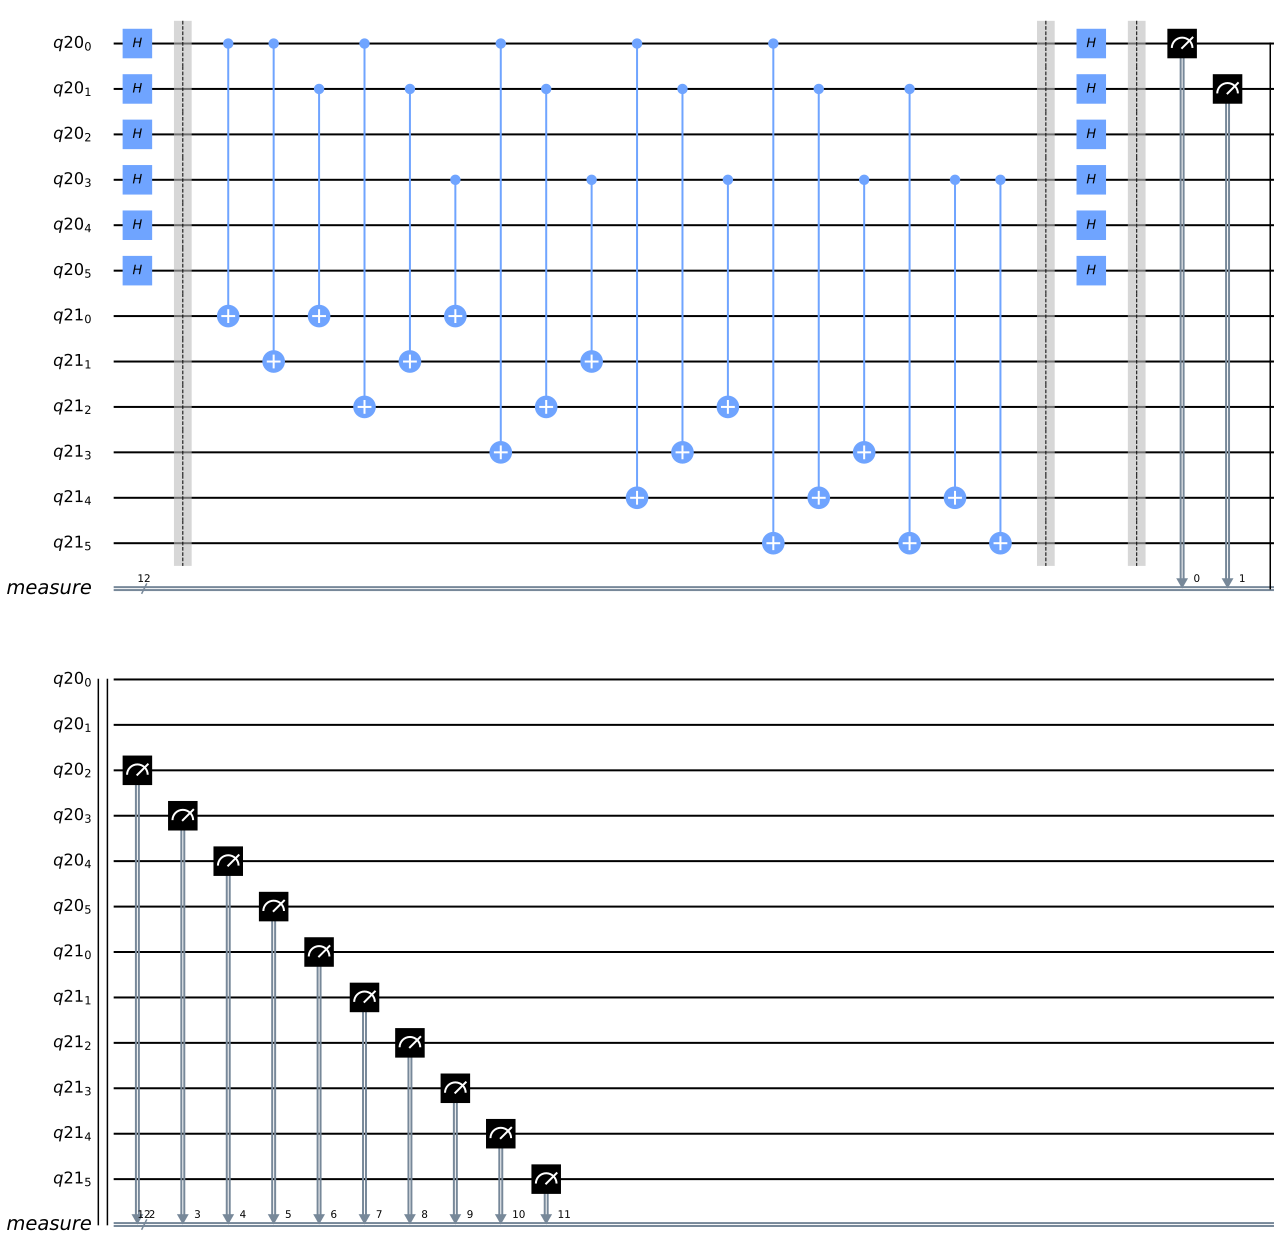

In [24]:
n = 6
s = '001011'

# circuit setup
qc = QuantumCircuit()
qr = QuantumRegister(n)
aqr = QuantumRegister(n)
qc.add_register(qr, aqr)

# had
qc.h(range(n))

# oracle
qc.barrier()
for idx, i in enumerate(s):
    if i == "0":
        for j in range(n):
            qc.cx(qr[idx], aqr[j])
    
qc.barrier()

# had
qc.h(range(n))

# measurement
qc.measure_all()

qc.draw(output="mpl")

{'001011': 520, '000000': 504}


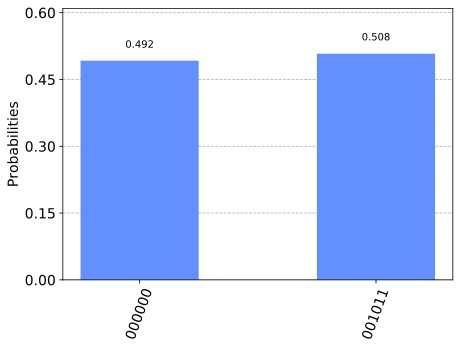

In [26]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [28]:
# Calculate the dot product of the results
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
001011, 110100, 001011.110100=0
001011, 000000, 001011.000000=0
